<a href="https://colab.research.google.com/github/simonprudhomme/stockmarket_portfolio_optimization/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages
!pip install pandas_datareader
!pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 3.2 MB/s 
     |████████████████████████████████| 2.8 MB 10.7 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# import packages
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
# Get list of assets (stocks) in the portfolio, here is just an example
assets = ['GOOG','MSFT','AMZN','MA','V','BABA',
          'ATD.TO','AAPL','AYM.TO','SU.TO','CM.TO',
          'GSY.TO','LSPD.TO','BNS.TO','CARE.TO',
          'RY.TO']

In [ ]:
# Assign weights to the stocks
weights = np.array([0.25 for x in assets])

In [ ]:
# Get stocks/portfolio starting date
stock_start_date = '2015-01-01'

In [ ]:
# Get the stocks/portfolio ending date (today)
stock_end_date = datetime.today().strftime('%Y-%m-%d')
stock_end_date

'2022-05-18'

In [ ]:
portfolio = web.DataReader(assets, data_source='yahoo', start=stock_start_date, end=stock_end_date)['Adj Close']
portfolio

Symbols,GOOG,MSFT,AMZN,MA,V,BABA,ATD.TO,AAPL,AYM.TO,SU.TO,CM.TO,GSY.TO,LSPD.TO,BNS.TO,CARE.TO,RY.TO
Date,,,,,,,,,,,,,,,,
2015-01-02,523.373108,41.108837,308.519989,81.783066,62.994793,103.599998,23.827810,24.678249,3.00,28.928141,35.214760,16.597916,NaN,46.679298,NaN,60.173244
2015-01-05,512.463013,40.730808,302.190002,79.482674,61.604252,101.000000,23.117964,23.983027,3.00,27.665686,34.520000,16.277271,NaN,45.789017,NaN,58.816170
2015-01-06,500.585632,40.132984,295.290009,79.310844,61.207302,103.320000,22.014832,23.985285,3.00,27.286173,33.548050,15.492517,NaN,45.219227,NaN,58.398594
2015-01-07,499.727997,40.642895,298.420013,80.544556,62.027367,102.129997,22.580786,24.321608,3.00,27.324892,33.555065,15.340626,NaN,45.347431,NaN,58.420982
2015-01-08,501.303680,41.838524,300.459991,81.797386,62.859325,105.029999,22.302595,25.256100,2.70,27.867062,33.404175,15.585337,NaN,45.710670,NaN,58.778893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,2263.219971,255.350006,2138.610107,321.239990,193.970001,81.089996,57.750000,142.559998,5.29,45.980000,67.620003,106.260002,21.049999,80.339996,3.95,125.339996
2022-05-13,2330.310059,261.119995,2261.100098,332.799988,199.229996,87.989998,58.439999,147.110001,5.73,46.919998,68.644997,112.269997,27.639999,81.070000,4.02,126.620003
2022-05-16,2295.850098,261.500000,2216.209961,329.730011,197.809998,86.480003,58.959999,145.539993,5.73,48.180000,69.360001,113.230003,25.459999,81.449997,4.00,126.889999


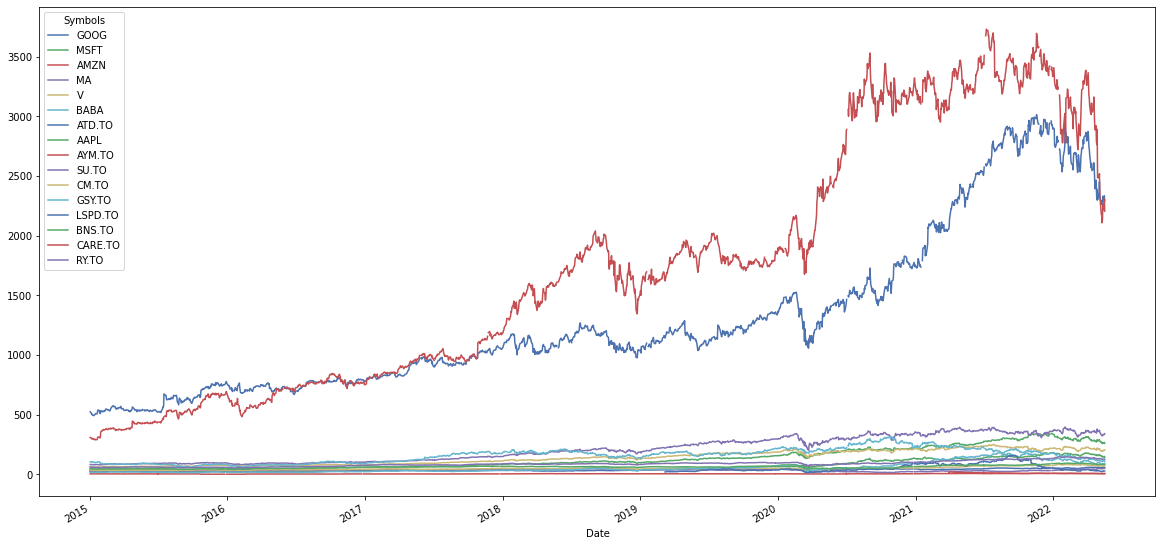

In [ ]:
portfolio.plot(figsize=(20,10));

In [ ]:
# Show Daily Return

returns = portfolio.pct_change()
returns

Symbols,GOOG,MSFT,AMZN,MA,V,BABA,ATD.TO,AAPL,AYM.TO,SU.TO,CM.TO,GSY.TO,LSPD.TO,BNS.TO,CARE.TO,RY.TO
Date,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020846,-0.009196,-0.020517,-0.028128,-0.022074,-0.025097,-0.029791,-0.028171,0.000000,-0.043641,-0.019729,-0.019318,NaN,-0.019072,NaN,-0.022553
2015-01-06,-0.023177,-0.014677,-0.022833,-0.002162,-0.006444,0.022970,-0.047718,0.000094,0.000000,-0.013718,-0.028156,-0.048212,NaN,-0.012444,NaN,-0.007100
2015-01-07,-0.001713,0.012706,0.010600,0.015555,0.013398,-0.011518,0.025708,0.014022,0.000000,0.001419,0.000209,-0.009804,NaN,0.002835,NaN,0.000383
2015-01-08,0.003153,0.029418,0.006836,0.015555,0.013413,0.028395,-0.012320,0.038422,-0.100000,0.019842,-0.004497,0.015952,NaN,0.008010,NaN,0.006126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-12,-0.007020,-0.019958,0.014791,-0.014208,-0.012096,-0.007831,0.051530,-0.026894,0.005703,-0.005838,-0.008068,0.003968,0.025828,-0.002978,-0.070588,-0.008308
2022-05-13,0.029644,0.022596,0.057276,0.035986,0.027118,0.085091,0.011948,0.031916,0.083176,0.020444,0.015158,0.056559,0.313064,0.009086,0.017722,0.010212
2022-05-16,-0.014788,0.001455,-0.019853,-0.009225,-0.007127,-0.017161,0.008898,-0.010672,0.000000,0.026854,0.010416,0.008551,-0.078871,0.004687,-0.004975,0.002132


In [ ]:
# Create and Show the annualized covariance matrix

trading_days_in_a_year = 252

cov_matrix_annual = returns.cov() * trading_days_in_a_year
cov_matrix_annual

Symbols,GOOG,MSFT,AMZN,MA,V,BABA,ATD.TO,AAPL,AYM.TO,SU.TO,CM.TO,GSY.TO,LSPD.TO,BNS.TO,CARE.TO,RY.TO
Symbols,,,,,,,,,,,,,,,,
GOOG,0.072244,0.053747,0.054477,0.046803,0.042793,0.043343,0.022990,0.047926,-0.049103,0.028713,0.020916,0.037553,0.110466,0.021496,0.045831,0.020974
MSFT,0.053747,0.074248,0.055806,0.051933,0.047456,0.044391,0.025019,0.054888,-0.051365,0.026510,0.022167,0.038419,0.115559,0.023169,0.044494,0.023360
AMZN,0.054477,0.055806,0.099218,0.043679,0.038933,0.049469,0.021509,0.051634,-0.109101,0.019609,0.014665,0.028511,0.101275,0.015576,0.046812,0.016013
MA,0.046803,0.051933,0.043679,0.080652,0.065979,0.042151,0.024976,0.048888,-0.052510,0.041853,0.027988,0.050417,0.131508,0.029969,0.031030,0.028555
V,0.042793,0.047456,0.038933,0.065979,0.066458,0.037683,0.024850,0.043456,-0.115463,0.035313,0.024922,0.047194,0.115464,0.026660,0.028759,0.026059
BABA,0.043343,0.044391,0.049469,0.042151,0.037683,0.153865,0.019439,0.044659,-0.012508,0.025820,0.017914,0.041377,0.134316,0.018583,0.076414,0.018597
ATD.TO,0.022990,0.025019,0.021509,0.024976,0.024850,0.019439,0.064858,0.022902,-0.074497,0.019281,0.016983,0.027763,0.062950,0.017757,0.031397,0.017078
AAPL,0.047926,0.054888,0.051634,0.048888,0.043456,0.044659,0.022902,0.084571,-0.055355,0.025970,0.022345,0.041649,0.118783,0.022295,0.037301,0.021946
AYM.TO,-0.049103,-0.051365,-0.109101,-0.052510,-0.115463,-0.012508,-0.074497,-0.055355,118.940644,0.007623,-0.006599,0.006297,0.019603,-0.010103,-0.012785,-0.027168


In [ ]:
# Calculate the portfolio variance

portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

8.078749989738041

In [ ]:
# Calculate the portfolio volatility (standard deviation)

portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

2.842314196167982

In [ ]:
# Calculate the annual portfolio return

portfolio_simple_annual_return = np.sum(returns.mean()*weights)*252
portfolio_simple_annual_return

2.2213221539847257

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [ ]:
# Portfolio Optimization 

mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio) 

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_constraint(lambda w: np.sum([w[x] for x in range(0,len(weights))])==1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('GOOG', 0.0), ('MSFT', 0.36116), ('AMZN', 0.31668), ('MA', 0.0), ('V', 0.0), ('BABA', 0.0), ('ATD.TO', 0.0), ('AAPL', 0.16328), ('AYM.TO', 0.00067), ('SU.TO', 0.0), ('CM.TO', 0.0), ('GSY.TO', 0.15822), ('LSPD.TO', 0.0), ('BNS.TO', 0.0), ('CARE.TO', 0.0), ('RY.TO', 0.0)])
Expected annual return: 28.5%
Annual volatility: 24.7%
Sharpe Ratio: 1.07


(0.2846622454747961, 0.2467280746751205, 1.0726880020576923)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=250000)
allocation, leftover = da.lp_portfolio()

print('Discrete allocation:', allocation)
print('Funds remaining: $', leftover)

Discrete allocation: {'MSFT': 348, 'AMZN': 36, 'AAPL': 283, 'AYM.TO': 14, 'GSY.TO': 358}
Funds remaining: $ 2.3556594848632812


/usr/local/lib/python3.7/dist-packages/cvxpy/problems/problem.py:1338: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  "Solution may be inaccurate. Try another solver, "


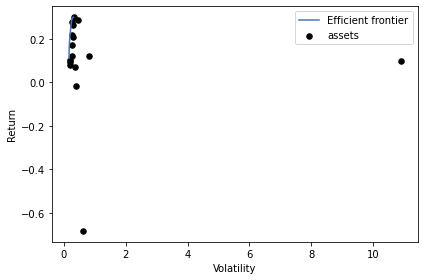

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.add_constraint(lambda w: np.sum([w[x] for x in range(0,len(weights))])==1)
plotting.plot_efficient_frontier(ef)